In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [1]:
# Cell 1: Load Dataset
import pandas as pd
file_path = (r"C:\Users\Awani\Downloads\survey lung cancer.csv")  # Replace with your dataset path
data = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [3]:
print("\nData Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())


Data Shape: (309, 16)

First 5 Rows:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0    

In [5]:
# Cell 2: Data Preprocessing
lung_cancer_data = data.copy()
# Check for missing values
print("\nMissing Values:\n", lung_cancer_data.isnull().sum())


Missing Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
# Encode categorical columns
categorical_columns = lung_cancer_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    lung_cancer_data[col] = lung_cancer_data[col].astype('category').cat.codes
    # Standardize binary columns (if applicable)
binary_columns = lung_cancer_data.select_dtypes(include=['int64']).columns.drop('AGE')
lung_cancer_data[binary_columns] = lung_cancer_data[binary_columns].applymap(lambda x: 0 if x == 1 else 1)

# Check encoded data
print("\nEncoded Data:\n", lung_cancer_data.head())


Encoded Data:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    

C:\Users\Awani\AppData\Local\Temp\ipykernel_2168\4088917429.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  lung_cancer_data[binary_columns] = lung_cancer_data[binary_columns].applymap(lambda x: 0 if x == 1 else 1)


In [9]:
# Cell 3: Descriptive Statistics Table
summary_stats = lung_cancer_data.describe().T
print("\nDescriptive Statistics:\n", summary_stats)


Descriptive Statistics:
                        count       mean       std   min   25%   50%   75%  \
GENDER                 309.0   0.524272  0.500221   0.0   0.0   1.0   1.0   
AGE                    309.0  62.673139  8.210301  21.0  57.0  62.0  69.0   
SMOKING                309.0   0.563107  0.496806   0.0   0.0   1.0   1.0   
YELLOW_FINGERS         309.0   0.569579  0.495938   0.0   0.0   1.0   1.0   
ANXIETY                309.0   0.498382  0.500808   0.0   0.0   0.0   1.0   
PEER_PRESSURE          309.0   0.501618  0.500808   0.0   0.0   1.0   1.0   
CHRONIC DISEASE        309.0   0.504854  0.500787   0.0   0.0   1.0   1.0   
FATIGUE                309.0   0.673139  0.469827   0.0   0.0   1.0   1.0   
ALLERGY                309.0   0.556634  0.497588   0.0   0.0   1.0   1.0   
WHEEZING               309.0   0.556634  0.497588   0.0   0.0   1.0   1.0   
ALCOHOL CONSUMING      309.0   0.556634  0.497588   0.0   0.0   1.0   1.0   
COUGHING               309.0   0.579288  0.494474 

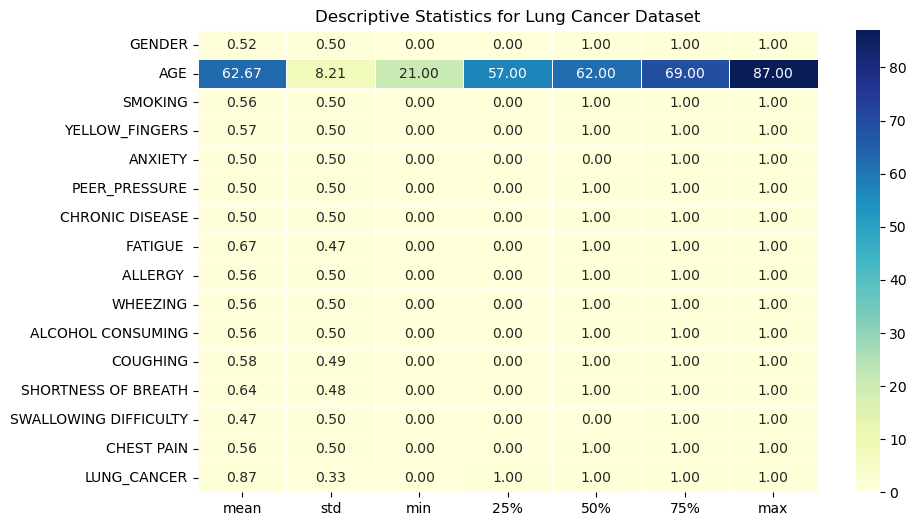

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(summary_stats.iloc[:, 1:], annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Descriptive Statistics for Lung Cancer Dataset')
plt.show()

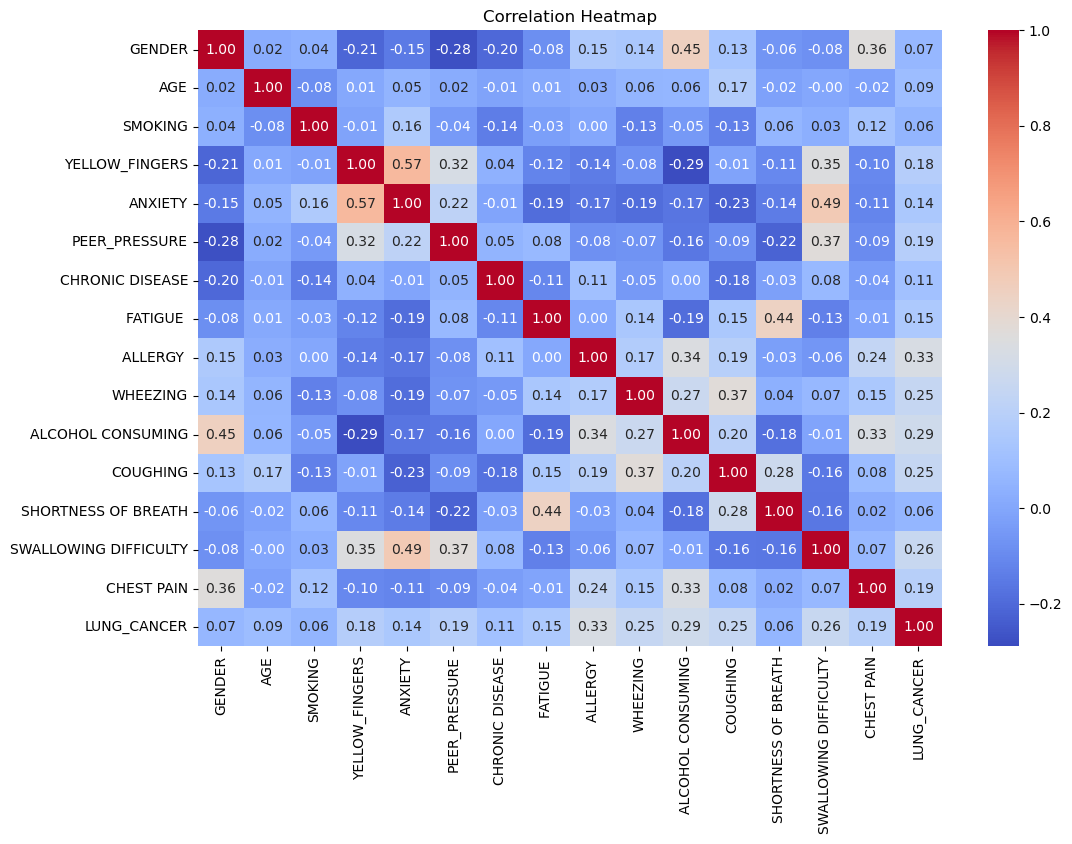

In [17]:
# Cell 4: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = lung_cancer_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# Cell 5: Prepare Data for Modeling
X = lung_cancer_data.drop(columns=['LUNG_CANCER'])
y = lung_cancer_data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing sets created successfully!")

Training and testing sets created successfully!


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, precision_recall_fscore_support
# Cell 6: Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

accuracies = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(f"\nClassification Report for {name}:\n", classification_report(y_test, predictions))
    accuracies.append(acc)

C:\Users\Awani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.97

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


KNN Accuracy: 0.95

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62


Random Forest Accuracy: 0.97

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98   

In [33]:
# Comparative Performance Table
performance_table = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracies
})
print("\nModel Performance Summary:\n", performance_table)


Model Performance Summary:
                  Model  Accuracy
0  Logistic Regression  0.967742
1                  KNN  0.951613
2        Random Forest  0.967742
3    Gradient Boosting  0.951613
4              XGBoost  0.983871


C:\Users\Awani\AppData\Local\Temp\ipykernel_2168\588258805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_table, palette='viridis')


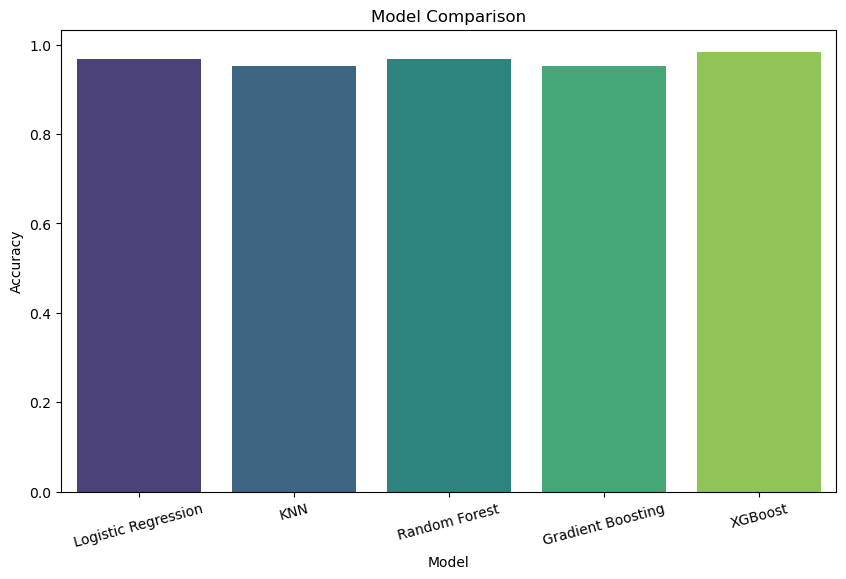

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_table, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.show()

In [37]:
# Cell 7: Feature Importance (Random Forest)
rf_model = models["Random Forest"]
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
 AGE                      0.209854
ALCOHOL CONSUMING        0.094806
ALLERGY                  0.075285
PEER_PRESSURE            0.066179
YELLOW_FINGERS           0.065012
SWALLOWING DIFFICULTY    0.061410
FATIGUE                  0.061395
ANXIETY                  0.057607
WHEEZING                 0.051175
CHRONIC DISEASE          0.049971
COUGHING                 0.048254
CHEST PAIN               0.046628
SHORTNESS OF BREATH      0.043648
GENDER                   0.037654
SMOKING                  0.031122
dtype: float64


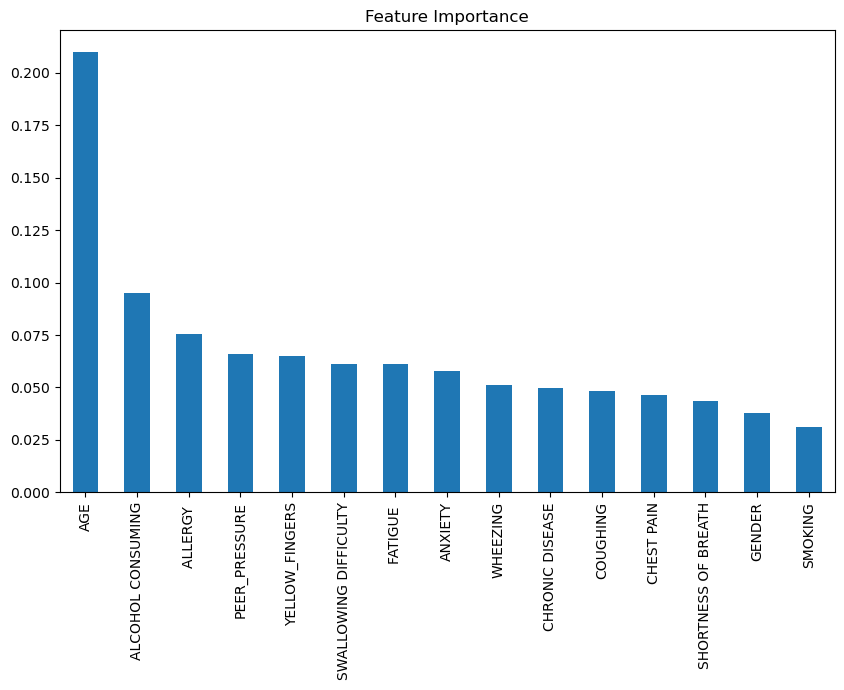

In [39]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

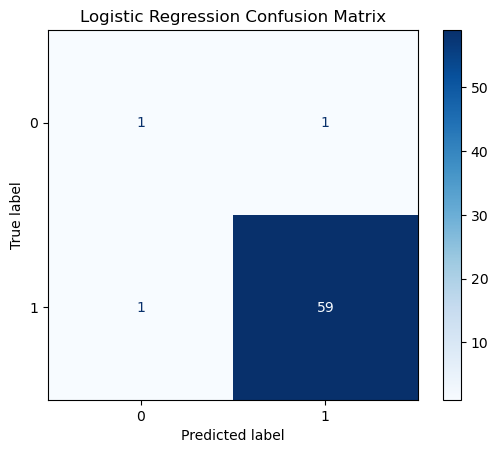

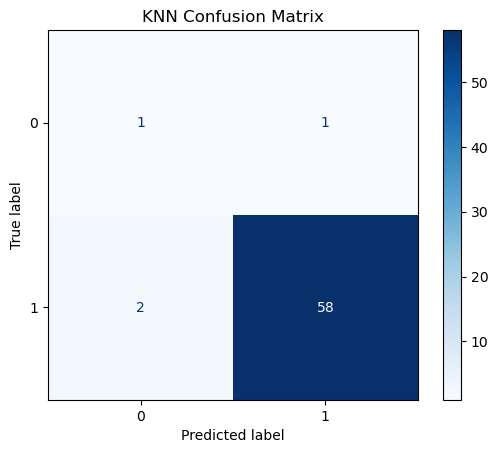

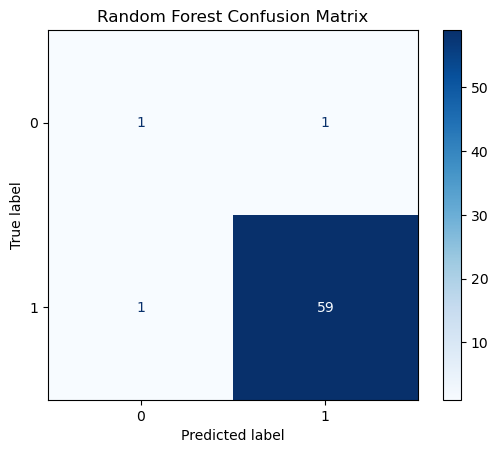

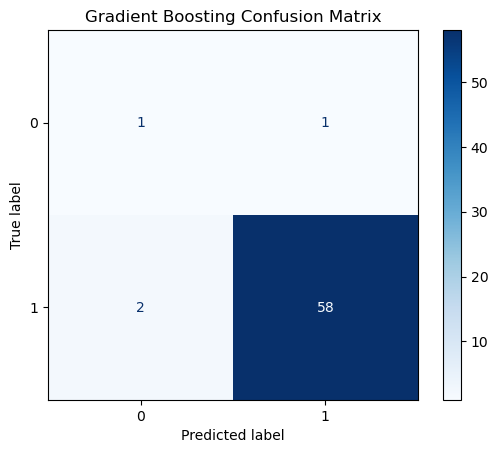

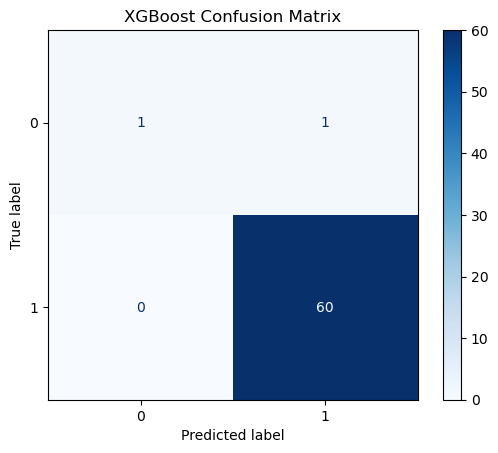

In [41]:
# Cell 8: Confusion Matrices
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    # Get predictions for the test set
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create ConfusionMatrixDisplay object
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Plot confusion matrix
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

In [45]:
from sklearn.feature_selection import RFE
# Cell 10: Feature Selection with RFE (Random Forest)
rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['AGE', 'YELLOW_FINGERS', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING'], dtype='object')


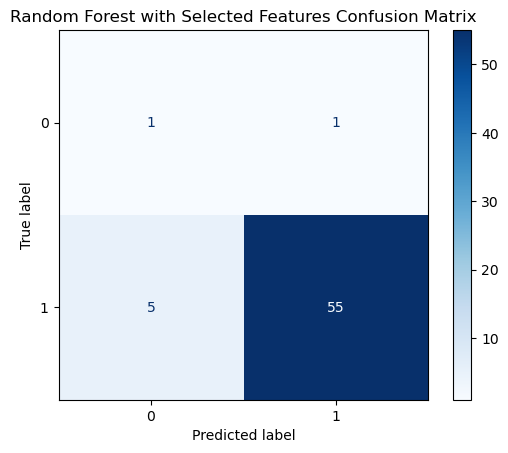

Analysis Complete!


In [47]:
# Train with Selected Features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

rf_model.fit(X_train_selected, y_train)
selected_rf_pred = rf_model.predict(X_test_selected)
ConfusionMatrixDisplay.from_predictions(y_test, selected_rf_pred, cmap='Blues')
plt.title('Random Forest with Selected Features Confusion Matrix')
plt.show()

print("Analysis Complete!")

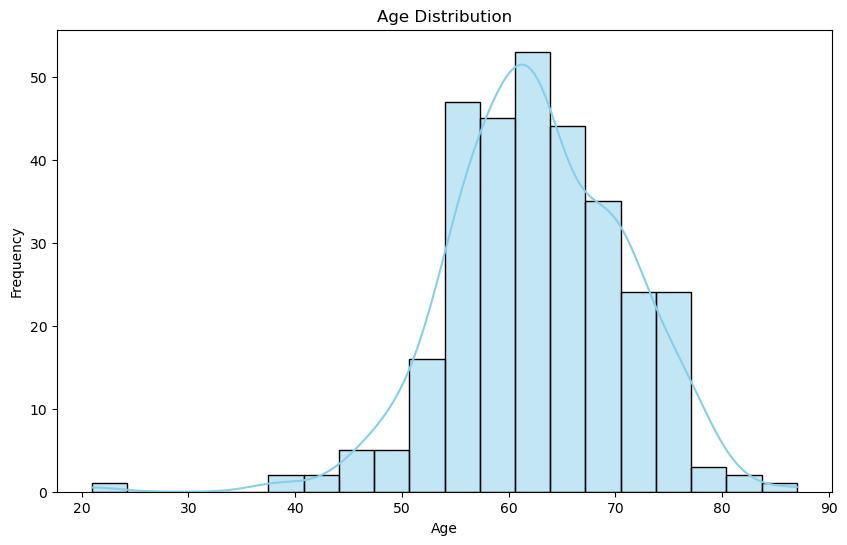

In [49]:
# Cell 11: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(lung_cancer_data['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Awani\AppData\Local\Temp\ipykernel_2168\2768070081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=lung_cancer_data['LUNG_CANCER'], palette='viridis')


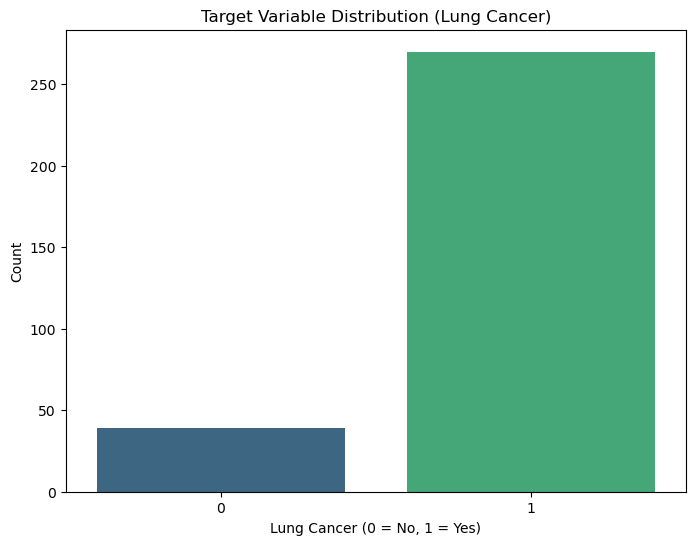

In [51]:
# Cell 12: Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=lung_cancer_data['LUNG_CANCER'], palette='viridis')
plt.title('Target Variable Distribution (Lung Cancer)')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

C:\Users\Awani\AppData\Local\Temp\ipykernel_2168\1517790847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=lung_cancer_data, palette='Set2')


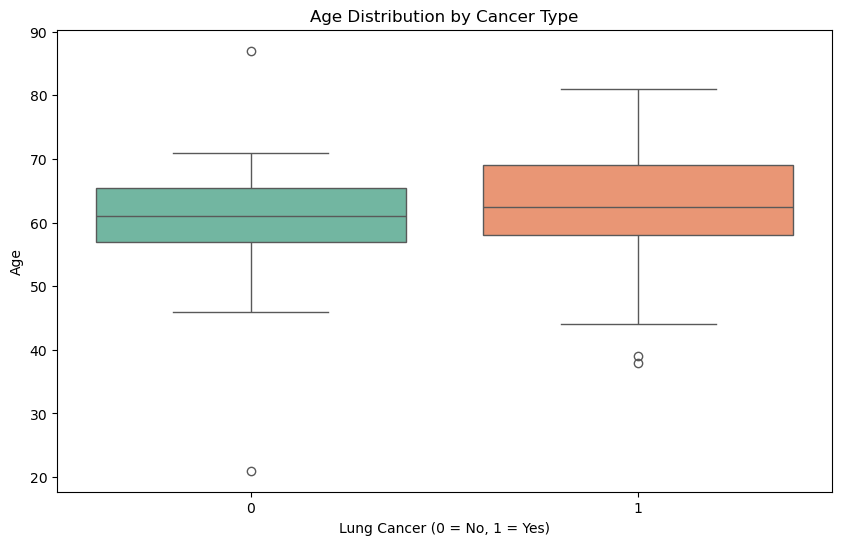

In [53]:
# Cell 13: Age Distribution by Cancer Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=lung_cancer_data, palette='Set2')
plt.title('Age Distribution by Cancer Type')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [55]:
# Cell 14: Comparative Metrics Table for All Models
metrics_table = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    accuracy = accuracy_score(y_test, y_pred)
    metrics_table.append([name, accuracy, precision, recall, f1])

metrics_df = pd.DataFrame(metrics_table, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\nComparative Metrics Table:\n", metrics_df)

C:\Users\Awani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Comparative Metrics Table:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.967742   0.983333  0.983333  0.983333
1                  KNN  0.951613   0.983051  0.966667  0.974790
2        Random Forest  0.967742   0.983333  0.983333  0.983333
3    Gradient Boosting  0.951613   0.983051  0.966667  0.974790
4              XGBoost  0.983871   0.983607  1.000000  0.991736


<Figure size 1200x600 with 0 Axes>

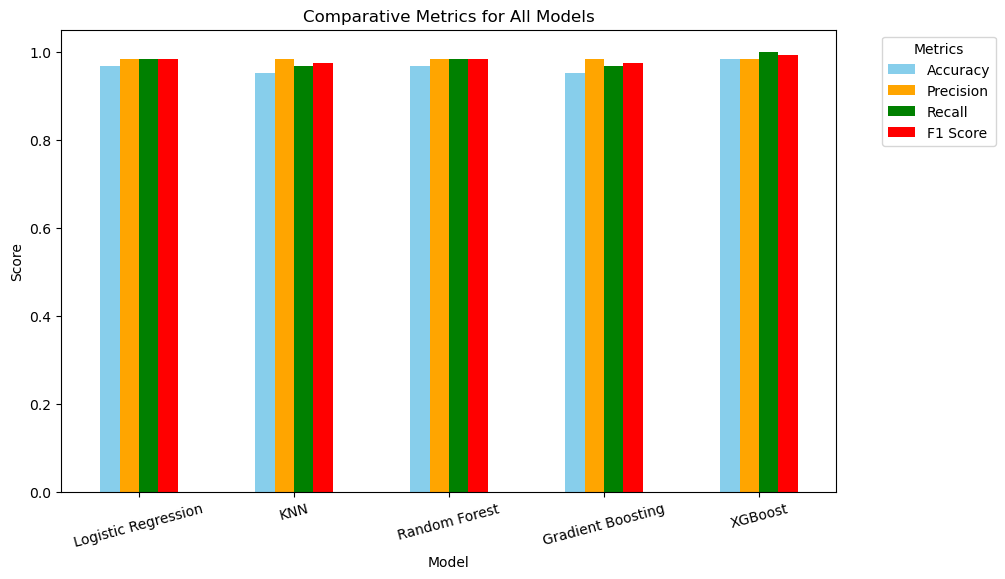

In [57]:
plt.figure(figsize=(12, 6))
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=15, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Comparative Metrics for All Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [61]:
import os
import joblib

# Create a directory to save the models in Colab
save_dir = '/content/models'
os.makedirs(save_dir, exist_ok=True)

# Save models to separate files in the created folder
for name, model in models.items():
    filename = f'{save_dir}/{name}_model.pkl'  # Path to save the model
    joblib.dump(model, filename)  # Save the model to the file
    print(f"{name} model saved as {filename}")

Logistic Regression model saved as /content/models/Logistic Regression_model.pkl
KNN model saved as /content/models/KNN_model.pkl
Random Forest model saved as /content/models/Random Forest_model.pkl
Gradient Boosting model saved as /content/models/Gradient Boosting_model.pkl
XGBoost model saved as /content/models/XGBoost_model.pkl


In [63]:
# Cell 15: Experimenting with Gradient Boosting
gb_model = models['Gradient Boosting']
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")

Gradient Boosting Accuracy: 0.95


In [65]:
# Cell 16: Experimenting with XGBoost
xgb_model = models['XGBoost']
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc:.2f}")

XGBoost Accuracy: 0.98


In [67]:
# Cell 17: Experimenting with Logistic Regression
lr_model = models['Logistic Regression']
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")

Logistic Regression Accuracy: 0.97


C:\Users\Awani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# Cell 18: Experimenting with KNN
knn_model = models['KNN']
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc:.2f}")

KNN Accuracy: 0.95


In [71]:
# Cell 19: Accuracy Matrix for All Models
accuracy_matrix = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Gradient Boosting", "XGBoost"],
    "Accuracy": [lr_acc, knn_acc, gb_acc, xgb_acc]
})
print("\nAccuracy Matrix:\n", accuracy_matrix)


Accuracy Matrix:
                  Model  Accuracy
0  Logistic Regression  0.967742
1                  KNN  0.951613
2    Gradient Boosting  0.951613
3              XGBoost  0.983871


C:\Users\Awani\AppData\Local\Temp\ipykernel_2168\2331907330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_matrix, palette='coolwarm')


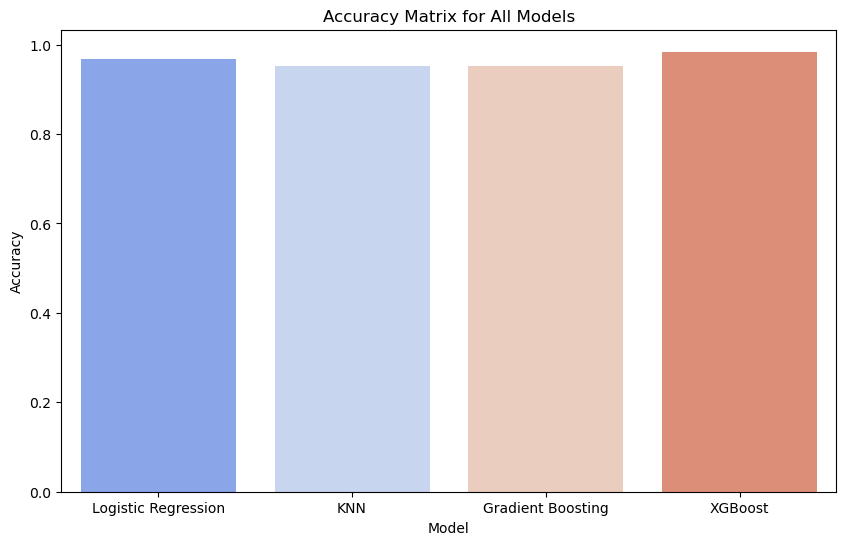

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_matrix, palette='coolwarm')
plt.title('Accuracy Matrix for All Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [75]:
# Create a directory for the Random Forest model
rf_save_dir = '/content/random_forest_model'
os.makedirs(rf_save_dir, exist_ok=True)

# Assuming 'random_forest_model' is the trained Random Forest model in your code
random_forest_model = models.get('RandomForest')  # Adjust if the model has a different name

# Save the Random Forest model to the created folder
rf_filename = f'{rf_save_dir}/random_forest_model.pkl'
joblib.dump(random_forest_model, rf_filename)
print(f"Random Forest model saved as {rf_filename}")

Random Forest model saved as /content/random_forest_model/random_forest_model.pkl


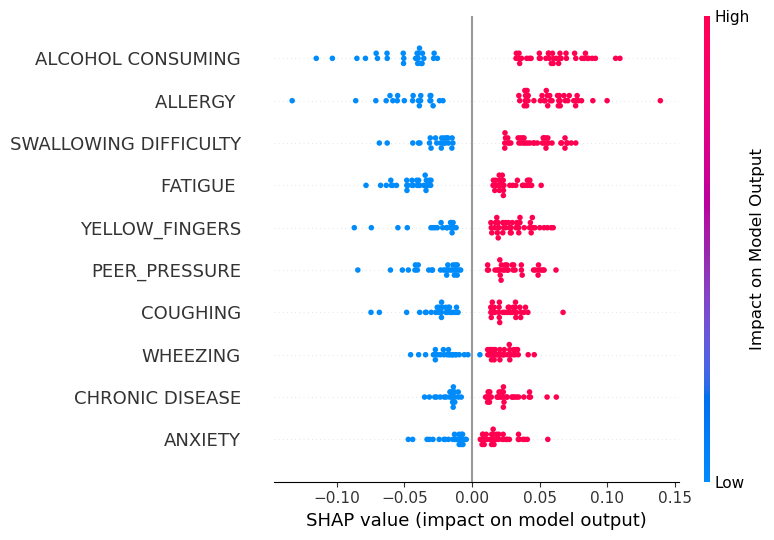

In [79]:
import shap
# Cell 20: SHAP Analysis with Random Forest
# Train Random Forest model
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Get feature names from X_test DataFrame columns
feature_names = X_test.columns.tolist()

# Access the SHAP values for the desired class (e.g., class 1)
shap_values_class1 = shap_values.values[:, :, 1]  # Assuming binary classification

# Plot summary using feature_names and updated shap_values
plt.title("Feature Importance based on SHAP Values", fontsize=16)
plt.xlabel("SHAP Value Impact", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Customize color for SHAP plot
shap.summary_plot(
    shap_values_class1,
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    color_bar_label="Impact on Model Output",
    max_display=10,  # Display only top 10 features
    show=True
)

In [81]:
import os
import pandas as pd

# Define output folder and file
output_folder = "lung_cancer_predictions"
output_file = "model_predictions.csv"

# Create directory if not exists
os.makedirs(output_folder, exist_ok=True)

# Assuming `model` is trained and `X_test` contains test features
# predictions = model.predict(X_test)  # Uncomment when model & X_test are available

# Example simulated predictions (replace with actual model predictions)
import numpy as np
predictions = np.random.choice([0, 1], size=10)  # 0 = No Cancer, 1 = Cancer Present
y_test = np.random.choice([0, 1], size=10)  # Actual values (for reference)

# Convert numerical predictions to meaningful labels
prediction_labels = ["Cancer Present" if pred == 1 else "No Cancer" for pred in predictions]
actual_labels = ["Cancer Present" if actual == 1 else "No Cancer" for actual in y_test]

# Create DataFrame with actual and predicted values
prediction_df = pd.DataFrame({
    "Actual": actual_labels,
    "Predicted": prediction_labels
})

# Save to CSV
csv_path = os.path.join(output_folder, output_file)
prediction_df.to_csv(csv_path, index=False)

print(f"Predictions saved at: {csv_path}")

Predictions saved at: lung_cancer_predictions\model_predictions.csv
